In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


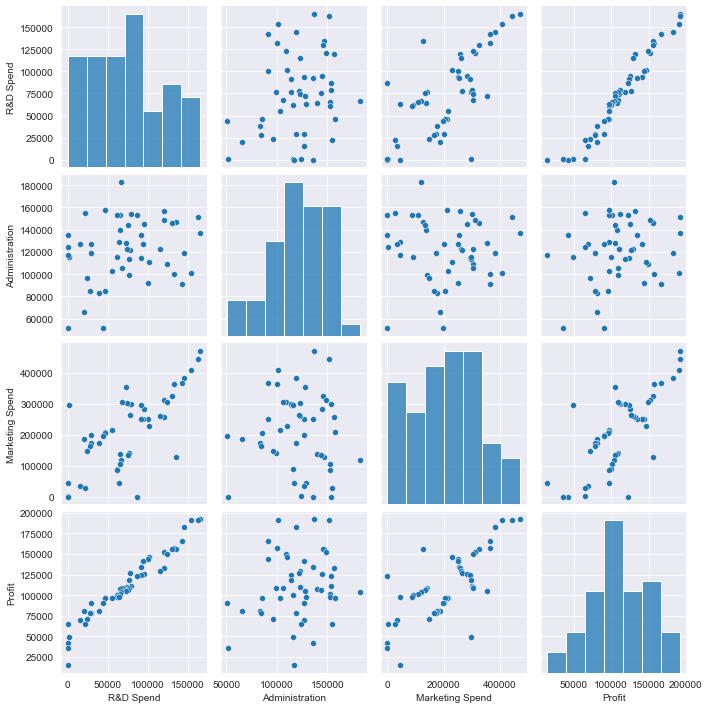

In [7]:
sns.set_style('darkgrid')
sns.pairplot(df)

In [8]:
df.columns=['R_and_D','Administration','MarketingSpend','Stats','profit']

In [9]:
import statsmodels.formula.api as smf
model = smf.ols('profit~R_and_D+Administration+MarketingSpend',data=df).fit()

In [10]:
model.params

Intercept         50122.192990
R_and_D               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [11]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
R_and_D           17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
R_and_D           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
ml_v= smf.ols('profit~R_and_D',data=df).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    19.320288
R_and_D      29.151139
dtype: float64 
 Intercept    2.782697e-24
R_and_D      3.500322e-32
dtype: float64


In [14]:
rsq_rd=smf.ols('R_and_D~Administration+MarketingSpend',data=df).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_ad=smf.ols('Administration~MarketingSpend+R_and_D',data=df).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_ms=smf.ols('MarketingSpend~Administration+R_and_D',data=df).fit().rsquared
vif_ms=1/(1-rsq_ms)

d1={'veriables':['R_and_D','Administration','MarketingSpend'],'VIF':[vif_rd,vif_ad,vif_ms]}
vif_frame=pd.DataFrame(d1)
vif_frame

,veriables,VIF
0,R_and_D,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


# Residual Analysis

# Test for normality of Residual(Q-Qplots)

In [15]:
import statsmodels.api as sm

<function matplotlib.pyplot.show(close=None, block=None)>

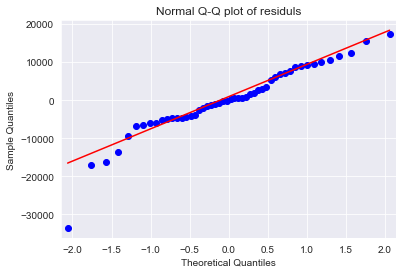

In [16]:
qqplots=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuls')
plt.show

In [17]:
list(np.where(model.resid>100))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [18]:
def get_standarized_values(vals):
    return (vals-vals.mean())/vals.std()

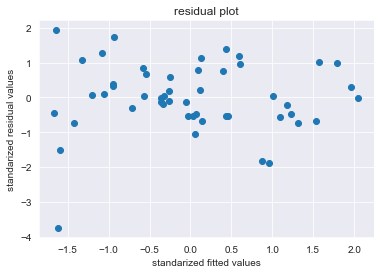

In [19]:
plt.scatter(get_standarized_values(model.fittedvalues),
           get_standarized_values(model.resid))
plt.title('residual plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()


# Residual vs Regressor

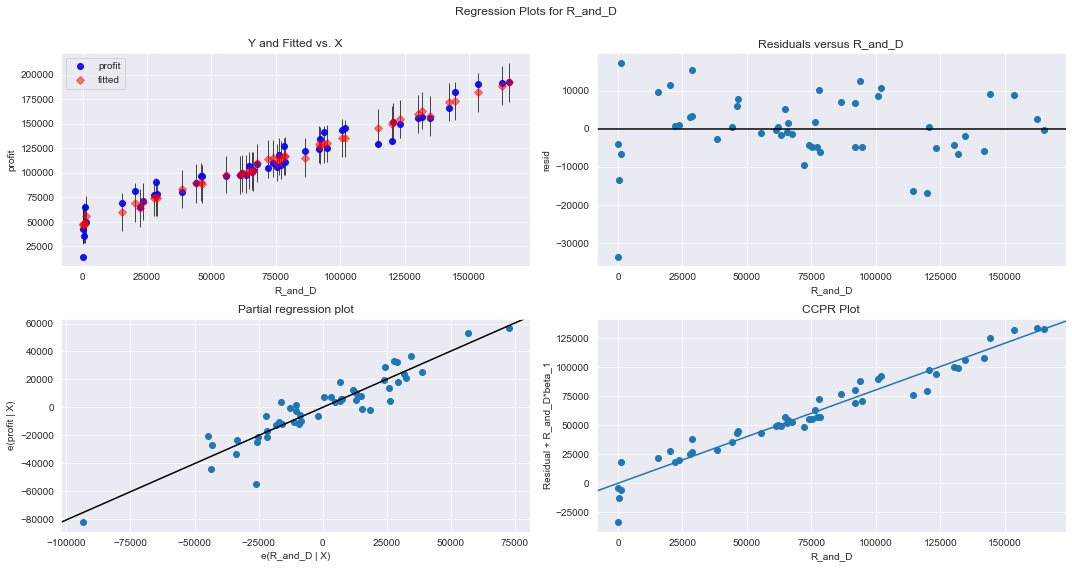

In [20]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model,'R_and_D',fig=fig)
plt.show()

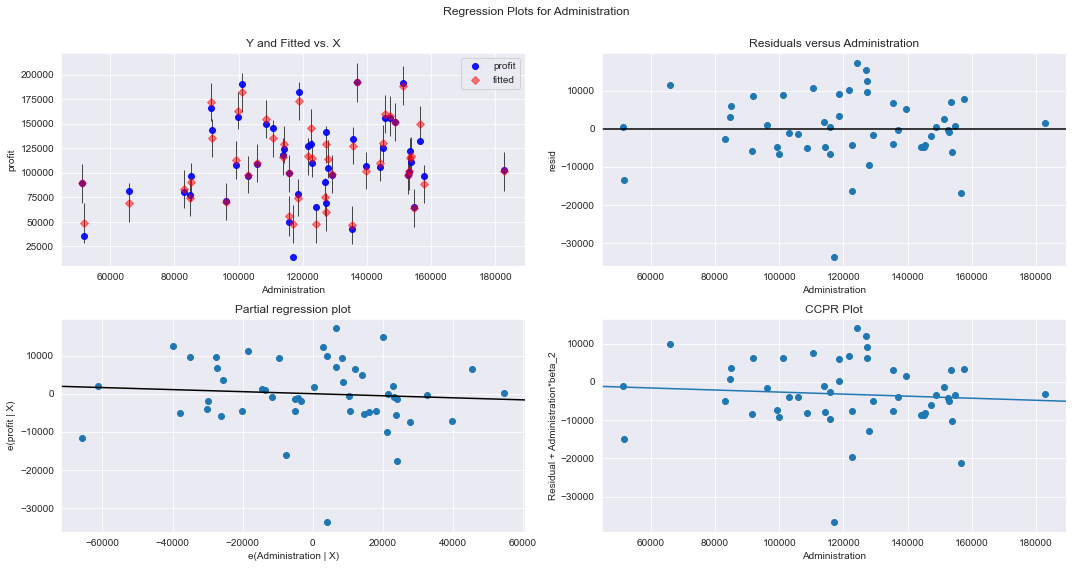

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

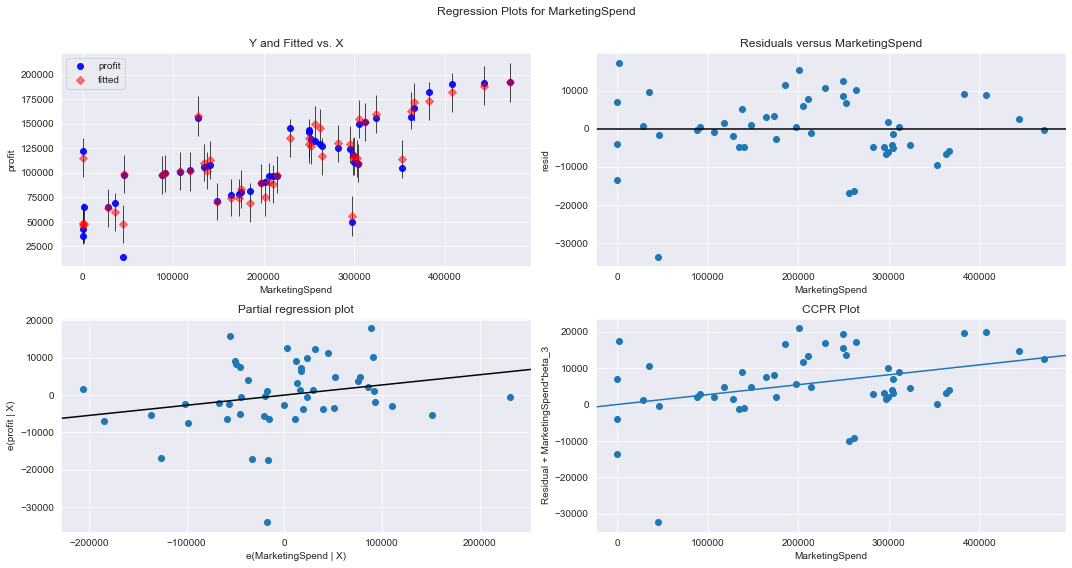

In [22]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,'MarketingSpend',fig=fig)
plt.show()

# Model Deletion Dignostic

# Detecting influencer/outlier

# Cook's  Distance

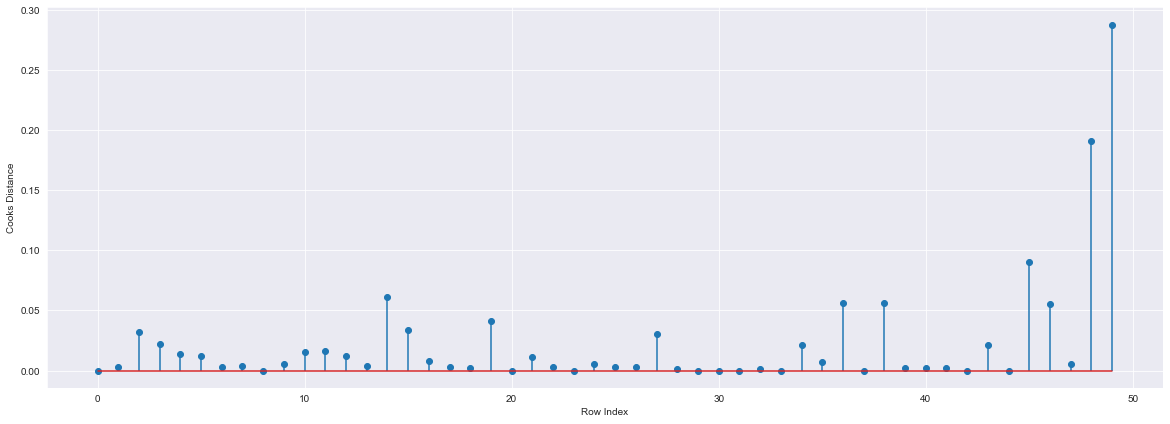

In [23]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

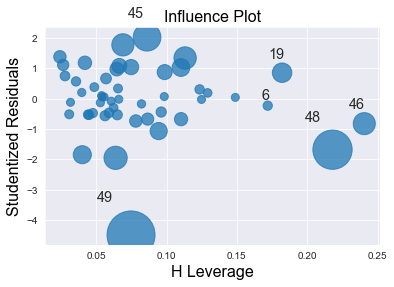

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model) 
plt.show()

In [26]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)

In [27]:
leverage_cutoff

0.36

In [28]:
df[df.index.isin([48,49])]

,R_and_D,Administration,MarketingSpend,Stats,profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [29]:
df.head()

,R_and_D,Administration,MarketingSpend,Stats,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving model

In [30]:
df_new=pd.read_csv('50_Startups.csv')

In [31]:
df_new.columns=['R_and_D','Administration','MarketingSpend','stats','Profit']

In [32]:
df1=df_new.drop(df_new.index[[48,49]],axis=0).reset_index()

In [33]:
df1=df1.drop(['index'],axis=1)

In [34]:
df1.columns=['R_and_D','Administration','MarketingSpend','stats','Profit']

In [35]:
df1

,R_and_D,Administration,MarketingSpend,stats,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
final_ml_ad= smf.ols('Profit~Administration+MarketingSpend+R_and_D',data=df1).fit()

In [37]:
(final_ml_ad.rsquared,final_ml_ad.aic)

(0.9626766170294073, 994.6690439260116)

In [38]:
final_ml_mr= smf.ols('Profit~MarketingSpend+R_and_D',data=df1).fit()

In [39]:
(final_ml_mr.rsquared,final_ml_mr.aic)

(0.9609119875752478, 994.8864429429412)

# Cooks distance

In [40]:
model_influence_ad=final_ml_ad.get_influence()
(c_ad,_)=model_influence_ad.cooks_distance

Text(0, 0.5, 'Cooks distance')

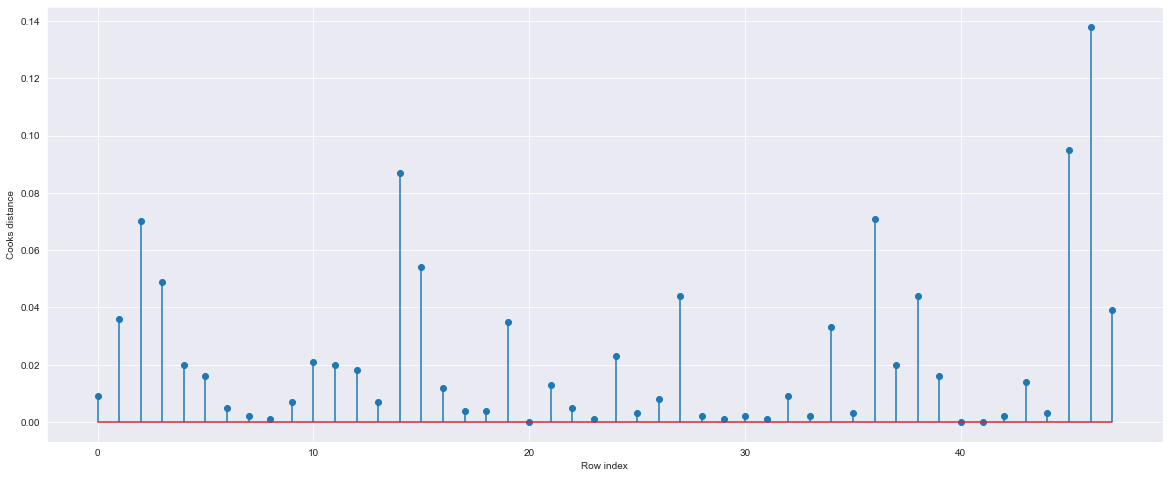

In [41]:
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df1)),np.round(c_ad,3));
plt.xlabel("Row index")
plt.ylabel("Cooks distance")

In [42]:
np.argmax(c_ad),np.max(c_ad)

(46, 0.138291339943344)

In [43]:
df2=df1.drop(df1.index[[45,46]],axis=0)

In [44]:
df2

,R_and_D,Administration,MarketingSpend,stats,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [45]:
df3=df2.reset_index()

In [46]:
df4=df3.drop(['index'],axis=1)

In [47]:
df4

,R_and_D,Administration,MarketingSpend,stats,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
final_ml_ad=smf.ols('Profit~Administration+MarketingSpend+R_and_D',data=df4).fit()

In [49]:
model_influence_ad= final_ml_ad.get_influence()
(c_ad,_)=model_influence_ad.cooks_distance

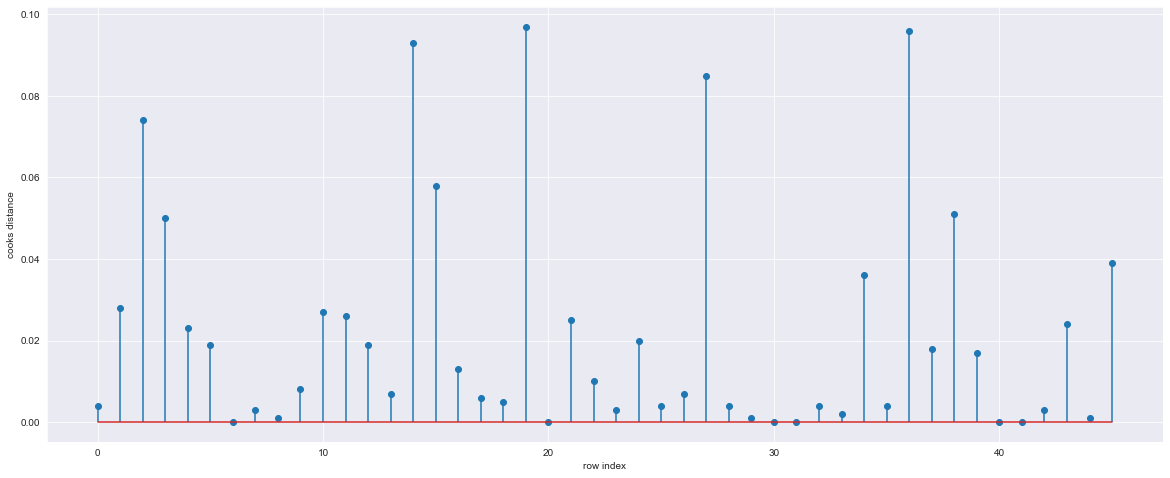

In [50]:
fig= plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df4)),np.round(c_ad,3));
plt.xlabel('row index')
plt.ylabel('cooks distance');

In [51]:
final_ml_ad=smf.ols('Profit~Administration+R_and_D+MarketingSpend',data=df4).fit()

In [52]:
(final_ml_ad.rsquared,final_ml_ad.aic)

(0.962593650298269, 950.0635928720131)

# Predicting for new data

In [53]:
new_data= pd.DataFrame({'R_and_D':134615.46,'Administration':153032.06,'MarketingSpend':471784.10,'stat':'Florida','Profit':107404.34},index=[1])

In [54]:
final_ml_ad.predict(new_data)

1    165551.177529
dtype: float64

In [55]:
final_ml_ad.predict(df_new.iloc[0:5,])

0    190130.816082
1    186454.033293
2    181105.940730
3    172478.455896
4    171731.889275
dtype: float64

In [56]:
pred_y=final_ml_ad.predict(df_new)

In [57]:
pred_y

0     190130.816082
1     186454.033293
2     181105.940730
3     172478.455896
4     171731.889275
5     163293.596350
6     156333.582943
7     158527.845161
8     150490.249670
9     154622.003463
10    135892.747070
11    136520.630139
12    129353.312991
13    127546.705225
14    148078.790426
15    145875.403771
16    117836.611892
17    129913.739743
18    129680.589848
19    115274.967305
20    117847.576718
21    117370.573803
22    115752.397504
23    111726.995236
24    114864.567380
25    103068.605246
26    110939.390996
27    115403.943556
28    101263.275850
29    102212.734351
30    101002.047454
31     98258.804621
32    100112.145051
33    100088.382611
34     90037.566390
35     93494.964961
36     77721.253491
37     93582.736764
38     74074.195105
39     87009.589892
40     77465.588069
41     78396.902643
42     74040.884976
43     62965.464205
44     66432.565336
45     51018.183229
46     59890.279108
47     49585.256517
48     54520.760435
49     51832.371084
